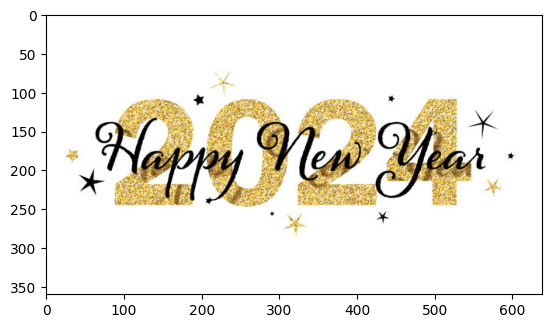

In [5]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from pydicom import dcmread
from pydicom.dataset import Dataset, FileMetaDataset
from pydicom.uid import ExplicitVRLittleEndian, generate_uid
from pydicom._storage_sopclass_uids import SecondaryCaptureImageStorage

meta = FileMetaDataset()
meta.TransferSyntaxUID = ExplicitVRLittleEndian


original_dicom = dcmread("sample_data/blue-circle.dcm")


ds = Dataset()
#Copy Metadata from original_dicom
ds.file_meta = meta
ds.PatientName = original_dicom.PatientName
ds.PatientID = original_dicom.PatientID
ds.PatientBirthDate = original_dicom.PatientBirthDate
ds.PatientSex = original_dicom.PatientSex

ds.StudyInstanceUID = original_dicom.StudyInstanceUID
ds.StudyDate = original_dicom.StudyDate
ds.StudyTime = original_dicom.StudyTime
ds.ReferringPhysicianName = None
ds.StudyID = original_dicom.StudyID
ds.AccessionNumber = None


#New Data
ds.Modality = "SC"
ds.SeriesInstanceUID = generate_uid()
ds.SeriesNumber = None
ds.ConversionType = "DF"

ds.InstanceNumber = None

#Add Numpy array 
im = Image.open("sample_data/image.png")
arr = np.asarray(im)
# For an RGBA image - will be different for monochrome
# We need to remove the alpha channel
arr = arr[:, :, :3] # Or whatever method you prefer
# Use multiple frames
arr = np.stack((arr, arr))
# The example dtype is 'uint8' -> unsigned 8-bit
ds.NumberOfFrames, ds.Rows, ds.Columns, ds.SamplesPerPixel = arr.shape
ds.PhotometricInterpretation = "RGB"
ds.BitsAllocated = 8  # 8-bit containers
ds.BitsStored = 8  # 8-bit samples
ds.HighBit = 7
ds.PixelRepresentation = 0  # unsigned image data
ds.PlanarConfiguration = 0  # should be with Pillow?
ds.PixelData = arr.tobytes()

ds.SOPClassUID = SecondaryCaptureImageStorage
ds.SOPInstanceUID = generate_uid()
ds.save_as("sample_data/sc.dcm", write_like_original=False)

ds = dcmread("sc.dcm")
arr = ds.pixel_array
plt.imshow(arr[0, ...])
plt.show()

In [3]:
original_dicom

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 242
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.8.498.13273713909719068980354078852867170114
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.8.498.27364069006046809016231924679252811609
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 1.4.2'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 192'
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY', 'OTHER']
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.368004

In [4]:
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 206
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.8.498.93327242183606654553955198885392122149
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.8.498.1
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.4.2'
-------------------------------------------------
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.8.498.93327242183606654553955198885392122149
(0008, 0020) Study Date                          DA: '20200914'
(0008, 0030) Study Time                          TM: '104700'
(0008, 0050) Acce